In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np 
import sklearn
import matplotlib.pyplot as plt 
import keras

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from sklearn.datasets import make_circles

n_sample = 1000
X, y = make_circles(n_samples=1000, noise=0.05, random_state=42)

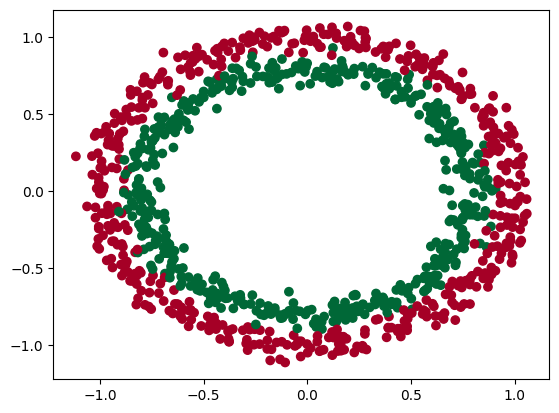

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn);

In [5]:
circles = pd.DataFrame(data={
    "X0": X[:, 0], 
    "X1": X[:, 1], 
    "label": y[:]
})

circles[:5]

,X0,X1,label
0,0.742207,0.246686,1
1,-0.734032,0.168692,1
2,-0.829859,0.221959,1
3,-0.429136,0.672230,1
4,0.445602,-0.894936,0


In [6]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.shape

(800, 2)

In [8]:
## Model-1 

model_1 = keras.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=(2, )), 
    # keras.layers.Dense(100, activation="relu"), 
    keras.layers.Dense(1, activation="sigmoid")
], name="Model_1")

model_1.compile(
    loss=keras.losses.BinaryCrossentropy(), 
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_1.summary()

history_1 = model_1.fit(
                X_train, y_train, 
                validation_data=(X_test, y_test),
                epochs=100, 
                verbose=0
            )

Model: "Model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401 (1.57 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
def plot_model_loss_vs_accuracy(history): 
    hist = pd.DataFrame(history.history) 
    plt.figure(figsize=(10, 7)) 
    plt.plot(hist['accuracy'], label="Train Accuracy") 
    plt.plot(hist["val_accuracy"], label="Test Accuracy") 
    plt.legend()
    
    plt.figure() 
    plt.plot(hist['loss'], label="Train Loss") 
    plt.plot(hist["val_loss"], label="Test Loss")
    plt.legend()
    plt.show();
    

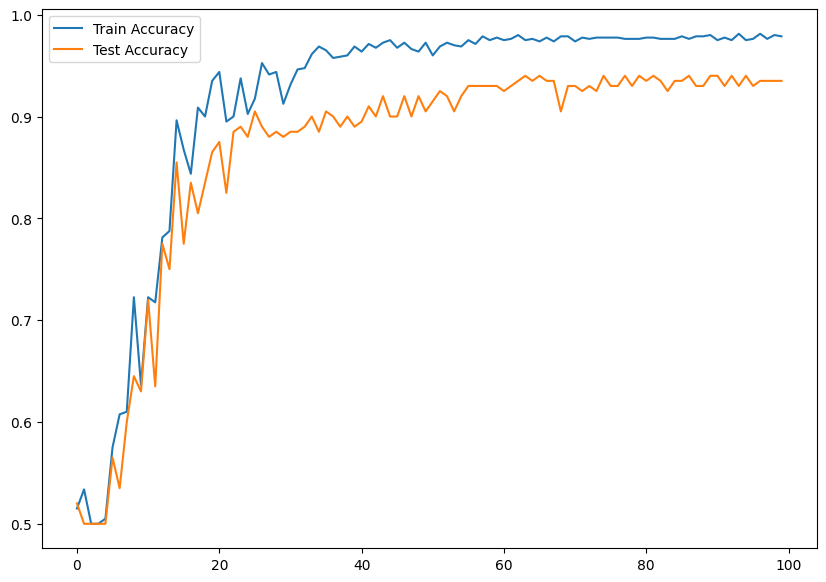

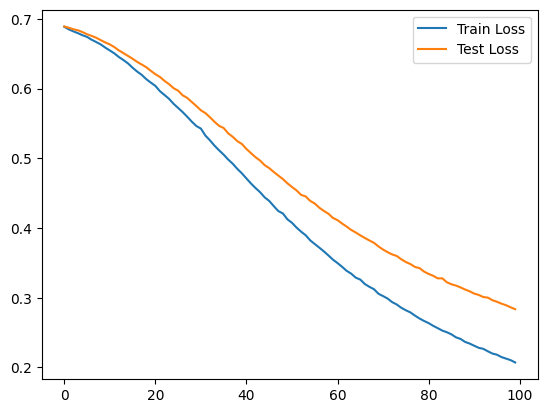

In [10]:
plot_model_loss_vs_accuracy(history_1)

In [11]:
y_preds = model_1.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [12]:
model_1.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9476 - loss: 0.2675 


[0.28350111842155457, 0.9350000023841858]

In [13]:
y_preds = model_1.predict(X_test)
# y_preds= np.round(np.squeeze(y_preds)).astype(int)
# y_preds[:20]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step


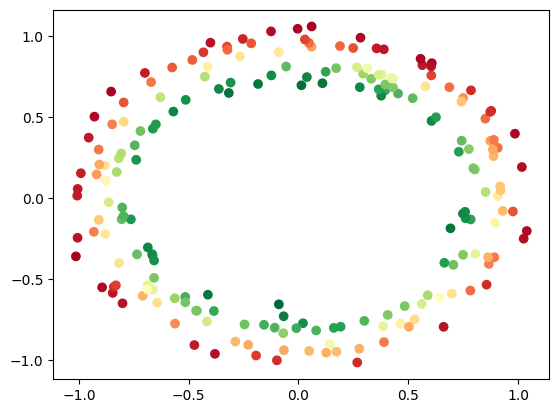

In [14]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_preds, cmap=plt.cm.RdYlGn);

In [15]:
hist = pd.DataFrame(history_1.history) 

In [16]:
hist[:10]

,accuracy,loss,val_accuracy,val_loss
0,0.51500,0.688616,0.520,0.689075
1,0.53375,0.684935,0.500,0.687239
2,0.50000,0.682051,0.500,0.685047
3,0.50000,0.679497,0.500,0.683637
4,0.50500,0.676509,0.500,0.681024
5,0.57500,0.674110,0.565,0.677915
6,0.60750,0.670099,0.535,0.675588
7,0.61000,0.666825,0.600,0.672945
8,0.72250,0.663338,0.645,0.669505
9,0.63625,0.658776,0.630,0.666199


In [17]:
from keras.utils import plot_model

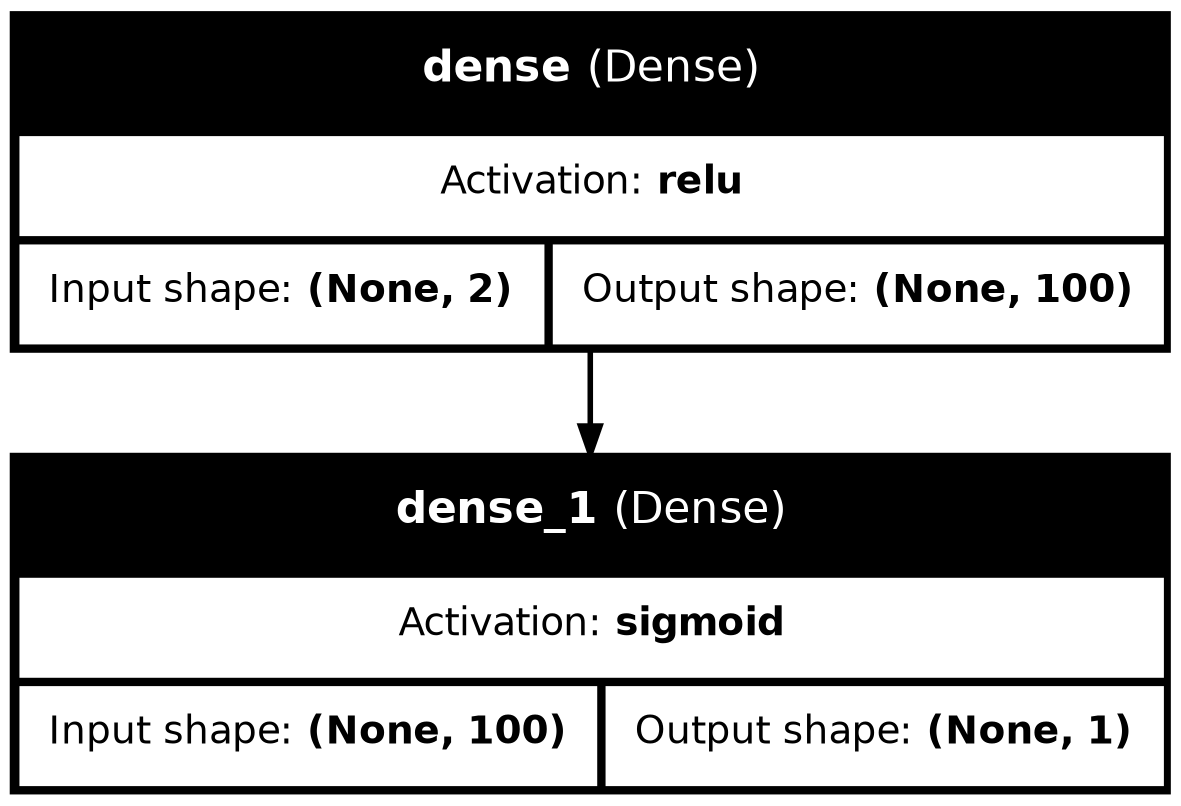

In [18]:
plot_model(model_1, show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [19]:
# model-2 
from keras.layers import Input, Dense
model_2 = keras.Sequential([
    Input(shape=(2, )), 
    Dense(100, activation='relu'), 
    Dense(100, activation='relu'), 
    Dense(1, activation='sigmoid')
], name="Model_2")

model_2.compile(
    loss=keras.losses.BinaryCrossentropy, 
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
) 

model_2.summary()

history_2 = model_2.fit(
                X_train, y_train, 
                validation_data=(X_test, y_test), 
                epochs=100, 
                verbose=0
            )

Model: "Model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,501 (41.02 KB)

 Trainable params: 10,501 (41.02 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model_2.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9503 - loss: 0.1337 


[0.1445816308259964, 0.9399999976158142]

In [21]:
def build_model(
                    num_dense_layers=2,
                    num_hidden_units=100,
                    optimizer_fn=lambda: keras.optimizers.Adam(),
                    metrics=["accuracy"]
                ):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(2,)))
    for i in range(num_dense_layers):
        model.add(keras.layers.Dense(num_hidden_units, activation='relu')) 
    model.add(keras.layers.Dense(1, activation='sigmoid')) 

    model.compile(
        loss=keras.losses.BinaryCrossentropy(), 
        optimizer=optimizer_fn(), 
        metrics=metrics
    )

    return model

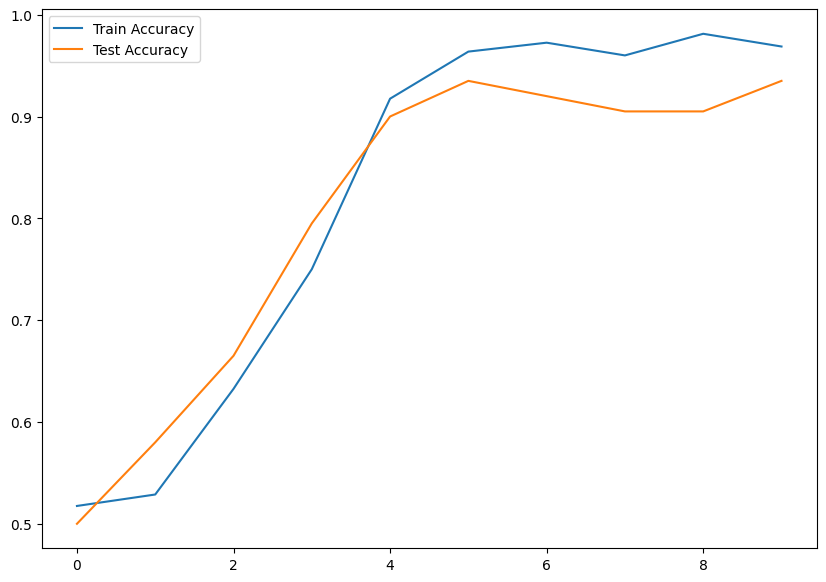

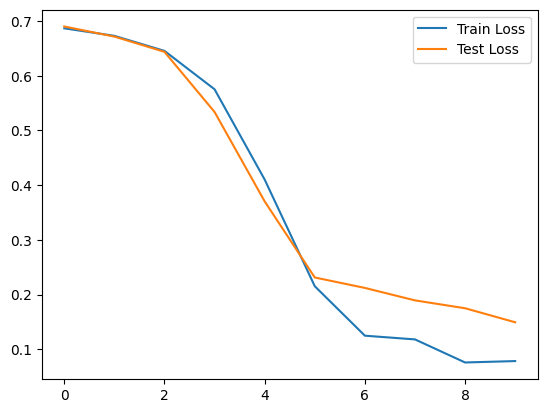

In [22]:
model_4 = build_model(num_dense_layers=3, num_hidden_units=150) 

history_4= model_4.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=10, 
    verbose=0
)

plot_model_loss_vs_accuracy(history_4)